####                *** FILMS ANALYSIS AT THE BOX OFFICE ***


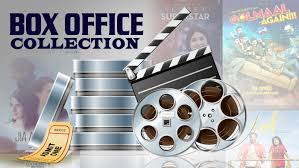

Author ; NjambiKimani

## Business Understanding #

#Problem Statement


*  Microsoft , a newbie in the world of movie creation, intends to enter into original video content space by launching a new film studio.However, there lacks the the know-how in this field.

    ### Questions to answer;
1. Determine the highest and lowest rated genres [ success] in the box office.
2. Determine the top return genres in terms of Profit/ Revenue.
3. What is the correlation between gross, budget and profit?
4. Determine performance trends in the box office over time for various genres?


#Objectives of the Study


* Aim was to analyse trends and patterns of performance of films in the box office to assist the head of Microsoft's new movie studio make sound decisions based on deduced findings and provided insights.He/She will be able to decide the type of films to create.

*  Explicitly relate findings to business needs by recommending actions that the business (Microsoft) should take.


#Data Understanding

In use is a zipped data file from Movie Box Office.
Several datasets are provided.
I selected a dataset 'bom.movie_gross'for this project.
Now, let us dive right into it and understand the data before analysing it into detail.

###Data Sources and Relevance
- Provided datafiles from Box Office Mojo dataset were ;
  - bom.movie_gross
  - imdb.title.basics
  - imdb.title.ratings

1.**--bom.movie.gross:**

This dataset contains information about the financial aspects of movies, including box office gross. Box office gross serves as a key variable to evaluate movie performance in financial terms.

2.**--imdb.title.basics:**

This dataset provides information about movies, including titles and genres. Genres are particularly significant as they are central to the analysis of which movie genres are performing well at the box office.

2.**--imdb.title.ratings:**

The dataset includes data on IMDb ratings for movies. These ratings are crucial for understanding audience preferences and examining their relationship with box office performance.



In [ ]:
# Importing Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

%matplotlib inline

In [ ]:
# Loading the selected dataset

df_gross = pd.read_csv('/content/bom.movie_gross.csv')
df_basics = pd.read_csv('/content/title.basics.csv')
df_ratings = pd.read_csv('/content/title.ratings.csv')

In [ ]:
#checking the column titles of the DataFrames
print(df_gross.columns)
print(df_basics.columns)
print(df_ratings.columns)

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')
Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')
Index(['tconst', 'averagerating', 'numvotes'], dtype='object')


###Exploring the datasets

**1.bom.movie.gross**

# Data Cleaning

***df_gross DataFrame***

In [ ]:
#re-evaluating columns with missing values in the df_gross DataFrame

df_gross.isna().sum()

,0
title,0
studio,5
domestic_gross,28
foreign_gross,1350
year,0


In [ ]:
#determining the percentage of the missing values

missing_gross = df_gross.isnull().sum().sort_values(ascending = True)
percent_missing_gross = missing_gross/len(df_gross)
percent_missing_gross

,0
title,0.000000
year,0.000000
studio,0.001476
domestic_gross,0.008267
foreign_gross,0.398583


foreign_gross is approximately 40% missing.This is significant as nearly half the data is missing. Imputing would introduce a lot of uncertainty unless there is a strong way to predict foreign gross (e.g., based on genre, budget, domestic performance).

Equally,filling with 0 could be misleading, implying the movie earned nothing abroad.

preferred filling with median.

In [ ]:
#checking the status of column "foreign_gross" in the movie.gross dataset.

df_gross['foreign_gross'].apply(type).value_counts()

,count
foreign_gross,
<class 'str'>,2037
<class 'float'>,1350


In [ ]:
#Converting column 'Foreign_gross' in the movie.gross dataset into a float and confirming the final datatype.
'''
 the data type object,may contain Commas, Strings representing numbers, or Empty strings or malformed entries
to perform numeric analysis then;
'''
df_gross['foreign_gross'] = pd.to_numeric(df_gross['foreign_gross'].astype(str).str.replace(',' , ""), errors = 'coerce')
df_gross['foreign_gross'].dtypes
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [ ]:
# filling missing values in foreign_gross with the median

median_foreign_gross = df_gross['foreign_gross'].median()
df_gross['foreign_gross']= df_gross['foreign_gross'].fillna(median_foreign_gross)

In [ ]:
# it is safe to drop missing values in rows in the columns 'Domestic_gross' and 'Studio".
#the percentage of missing values is very minimal.

df_gross.dropna(subset=['studio','domestic_gross'], inplace= True)


In [ ]:
#Confirming that all cleaunp is done for the DataFrame 'df_gross'

df_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB


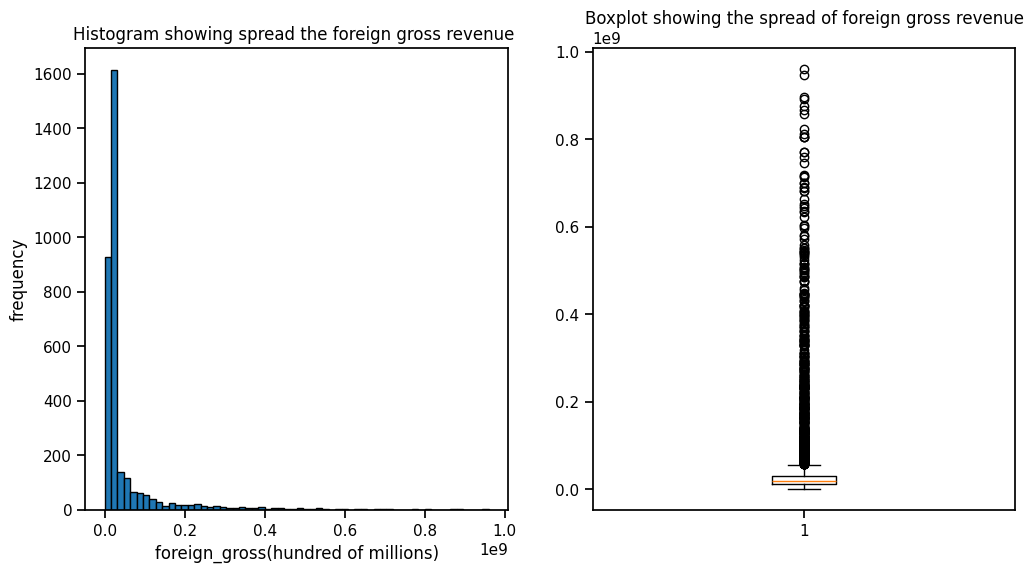

In [ ]:
# Visualizing distribution of foreign_gross
#creating a box plot

fig, ax = plt.subplots(1, 2, figsize =(12,6))

#creating the different plots

ax[0].hist(df_gross['foreign_gross'],edgecolor ='black', bins= 60)
ax[0].set_xlabel('foreign_gross(hundred of millions)')
ax[0].set_ylabel('frequency')
ax[0].set_title('Histogram showing spread the foreign gross revenue ')
sns.set_context('notebook')
ax[1].boxplot(df_gross['foreign_gross'])
ax[1].set_title('Boxplot showing the spread of foreign gross revenue')

plt.tight_layout;

our data is skewed to the right (positively skewed)

***df_basics DataFrame***

In [ ]:
#re-evaluating columns with missing values in the df_basics DataFrame

df_basics.isna().sum()

,0
tconst,0
primary_title,1
original_title,22
start_year,0
runtime_minutes,31739
genres,5408


In [ ]:
#Determining the percentage of missing values in the dataframe 'df_basics'.
missing_basics = df_basics.isna().sum().sort_values(ascending = True)
percent_missing_basics = missing_basics/len(df_basics)
percent_missing_basics

,0
tconst,0.000000
start_year,0.000000
primary_title,0.000007
original_title,0.000151
genres,0.037005
runtime_minutes,0.217176


In [ ]:
# removing rows where primary_title and original_title are missing.
df_basics.dropna(subset = ['primary_title', 'original_title'], inplace=True)

In [ ]:
#replacing the runtime_minutes with the median to sort the 21.7% of the missing values.

median_runtime_minutes = df_basics['runtime_minutes'].median()
df_basics['runtime_minutes']= df_basics['runtime_minutes'].fillna(median_runtime_minutes)

In [ ]:
df_basics['runtime_minutes'].dtypes

dtype('float64')

In [ ]:
df_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146122 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146122 non-null  object 
 1   primary_title    146122 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146122 non-null  int64  
 4   runtime_minutes  146122 non-null  float64
 5   genres           140733 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.8+ MB


Text(0.5, 1.0, 'Boplot showimg the spread of runtime in minutes')

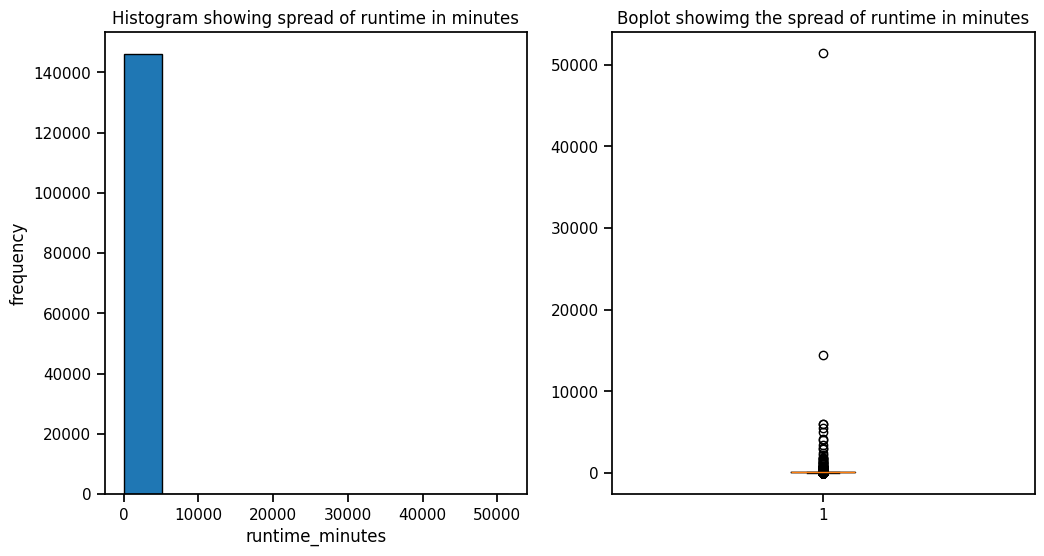

In [ ]:
#Visualizing with a box plot, -> Runtine_minutes

fig, ax = plt.subplots(1, 2, figsize =(12,6))

#creating the different plots for each column

ax[0].hist(df_basics['runtime_minutes'],edgecolor ='black')
ax[0].set_xlabel('runtime_minutes')
ax[0].set_ylabel('frequency')
ax[0].set_title('Histogram showing spread of runtime in minutes')
sns.set_context('notebook')
ax[1].boxplot(df_basics['runtime_minutes'])
ax[1].set_title('Boplot showimg the spread of runtime in minutes')

In [ ]:
df_basics['runtime_minutes'].sort_values(ascending= False).head(15)

,runtime_minutes
132389,51420.0
44840,14400.0
123467,6017.0
87264,6000.0
88717,5460.0
90578,4980.0
15381,4200.0
105225,4080.0
12974,3450.0
67437,3077.0


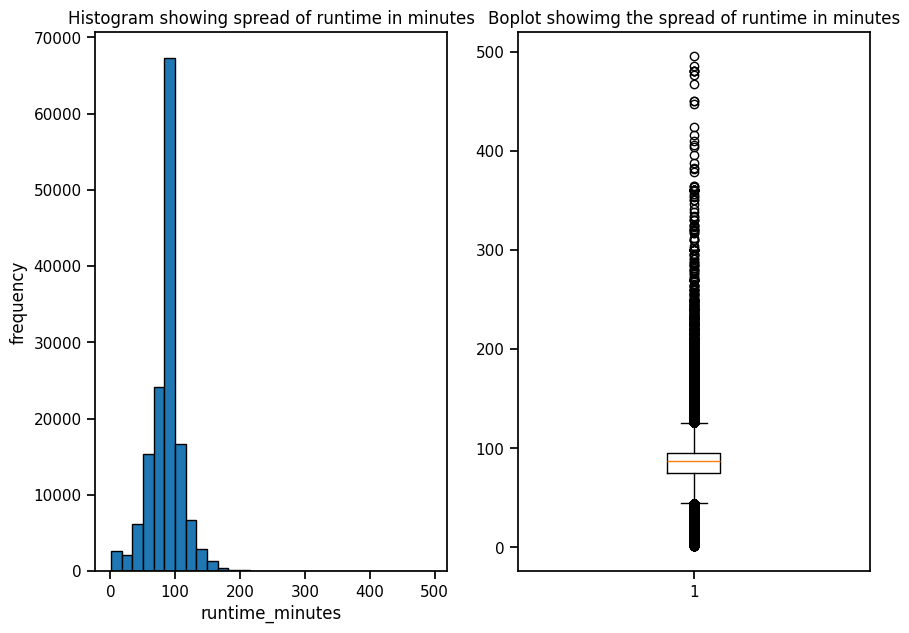

In [ ]:
#Filtering out outliers and replotting.

filtered_df_basics = df_basics[df_basics["runtime_minutes"]<500]

fig, ax = plt.subplots(1, 2, figsize =(10,7))

#creating the different plots for each column

ax[0].hist(filtered_df_basics['runtime_minutes'],edgecolor ='black', bins =30)
ax[0].set_xlabel('runtime_minutes')
ax[0].set_ylabel('frequency')
ax[0].set_title('Histogram showing spread of runtime in minutes')

ax[1].boxplot(filtered_df_basics['runtime_minutes'])
ax[1].set_title('Boplot showimg the spread of runtime in minutes')
plt.show()

In [ ]:
#replacing the 3.7% of missing values in genres column with 'Unknown'
# df_basics['genres']= df_basics['genres'].fillna('Unknown')


df_basics.fillna({'genres': 'Unknown'}, inplace =True)

In [ ]:
# confirming that DatFrame 'df_basics 'is fully cleaned up.

df_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146122 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146122 non-null  object 
 1   primary_title    146122 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146122 non-null  int64  
 4   runtime_minutes  146122 non-null  float64
 5   genres           146122 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.8+ MB


In [ ]:
df_basics.describe()

,start_year,runtime_minutes
count,146122.000000,146122.000000
mean,2014.621494,86.362806
std,2.733595,147.202416
min,2010.000000,1.000000
25%,2012.000000,75.000000
50%,2015.000000,87.000000
75%,2017.000000,95.000000
max,2115.000000,51420.000000


#Data Analysis and Visualization

###Data Combination and Feature Engineering



In [ ]:
#checking the contents of the DataFrames
print(df_gross.columns)
print(df_basics.columns)
print(df_ratings.columns)
print(filtered_df_basics.columns)

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')
Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')
Index(['tconst', 'averagerating', 'numvotes'], dtype='object')
Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')


In [ ]:
# Combine all the datafiles into one bom.movie_gross, imdb.title.basics,and imdb.title.ratings'
# df_basics and df_ratings are joined via tconst as the primary key.
# df_gross is joined to the result-(combined_data1) using primary_title = title.
#Performed an inner join to only maintain complete data for all the datasets.


#1. merging df_basics and df_ratings via tconst.

combined_data1 = pd.merge(df_basics, df_ratings, on = 'tconst', how ='inner')

#2. merging the result with title and the primary title.

Combined_finaldata = pd.merge(combined_data1, df_gross, left_on ="primary_title", right_on ="title", how = 'inner' )

#showing the outcome columns

Combined_finaldata.head()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,18700000.0,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000.0,2012
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000.0,2013
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000.0,2014
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,Uni.,652300000.0,1019.4,2015


In [ ]:
Combined_finaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004 entries, 0 to 3003
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3004 non-null   object 
 1   primary_title    3004 non-null   object 
 2   original_title   3004 non-null   object 
 3   start_year       3004 non-null   int64  
 4   runtime_minutes  3004 non-null   float64
 5   genres           3004 non-null   object 
 6   averagerating    3004 non-null   float64
 7   numvotes         3004 non-null   int64  
 8   title            3004 non-null   object 
 9   studio           3004 non-null   object 
 10  domestic_gross   3004 non-null   float64
 11  foreign_gross    3004 non-null   float64
 12  year             3004 non-null   int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 305.2+ KB


In [ ]:
# Removing duplicate columns.'primary_title' ,'original_title'  and hence maintain 'title'.

drop_columns = ['primary_title', 'original_title']
Combined_finaldata.drop(columns = drop_columns, inplace =True)

print(Combined_finaldata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004 entries, 0 to 3003
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3004 non-null   object 
 1   start_year       3004 non-null   int64  
 2   runtime_minutes  3004 non-null   float64
 3   genres           3004 non-null   object 
 4   averagerating    3004 non-null   float64
 5   numvotes         3004 non-null   int64  
 6   title            3004 non-null   object 
 7   studio           3004 non-null   object 
 8   domestic_gross   3004 non-null   float64
 9   foreign_gross    3004 non-null   float64
 10  year             3004 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 258.3+ KB
None


In [ ]:
print(Combined_finaldata.shape)

(3004, 11)


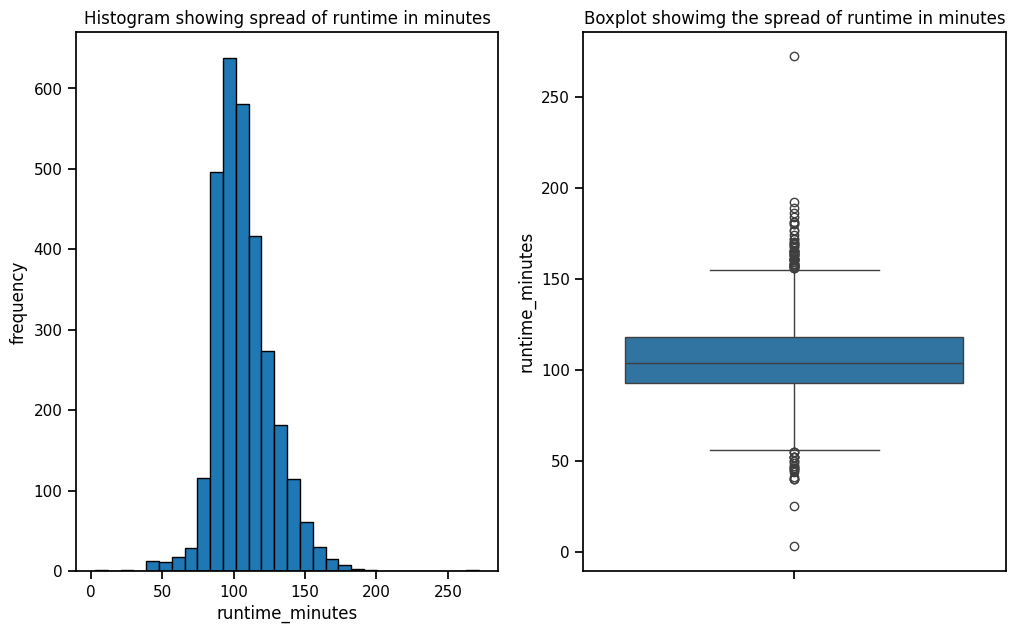

In [ ]:
#creating the different plots for each column

fig, ax = plt.subplots(1, 2, figsize =(12,7))

#Histogram plot

ax[0].hist(Combined_finaldata['runtime_minutes'],edgecolor ='black', bins =30)
ax[0].set_xlabel('runtime_minutes')
ax[0].set_ylabel('frequency')
ax[0].set_title('Histogram showing spread of runtime in minutes')

#Box Plot

sns.boxplot(Combined_finaldata['runtime_minutes'])
ax[1].set_title('Boxplot showimg the spread of runtime in minutes')
plt.show()

Histogram distribution is approximately normal (bell-shaped).Most films have runtimes between 90 and 120 minutes this suggests that most movies follow conventional industry standards for length. Very few movies fall below 60 minutes or above 150 minutes indicating that shorter or as well as exceptionally long movies are uncommon in the industry.

Boxplot shows that the median runtime is just above 100 minutes.The interquartile range (IQR) is roughly 90 to 115 minutes.

However; there are several outliers; Short outliers below approximately 50 minutes.and long outliers above an approximate of 150–160 minutes, with one very high value close to 275 minutes.

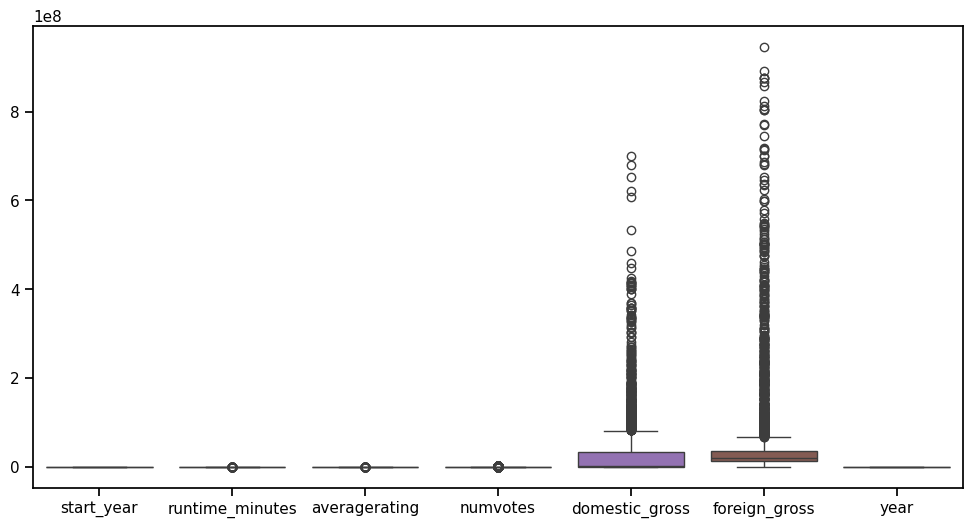

In [ ]:
# Checking for outliers in the entire combined dataset.

fig,ax =plt.subplots(figsize =(12,6))
sns.boxplot(Combined_finaldata);

###Data visualization

In [ ]:
from matplotlib.ticker import FuncFormatter

In [ ]:
# Adding a new column 'total_grossvalue'

Combined_finaldata['total_grossvalue']= Combined_finaldata.domestic_gross +Combined_finaldata.foreign_gross

#checking the dataset for changes

Combined_finaldata.head()

,tconst,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,total_grossvalue
0,tt0315642,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,18700000.0,2016,19800000.0
1,tt0337692,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
2,tt0359950,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000.0,2013,188100000.0
3,tt0365907,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000.0,2014,53200000.0
4,tt0369610,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,Uni.,652300000.0,1019.4,2015,652301019.4


In [ ]:
#Determining the highest performing Studios.

studio_totals = Combined_finaldata.groupby('studio')['total_grossvalue'].sum().sort_values(ascending = False).head(20)
studio_totals

,total_grossvalue
studio,
BV,1.199351e+11
Fox,8.275901e+10
Uni.,8.184387e+10
WB,7.090148e+10
Sony,5.041932e+10
Par.,4.823893e+10
WB (NL),2.575060e+10
LGF,2.380744e+10
P/DW,1.503380e+10


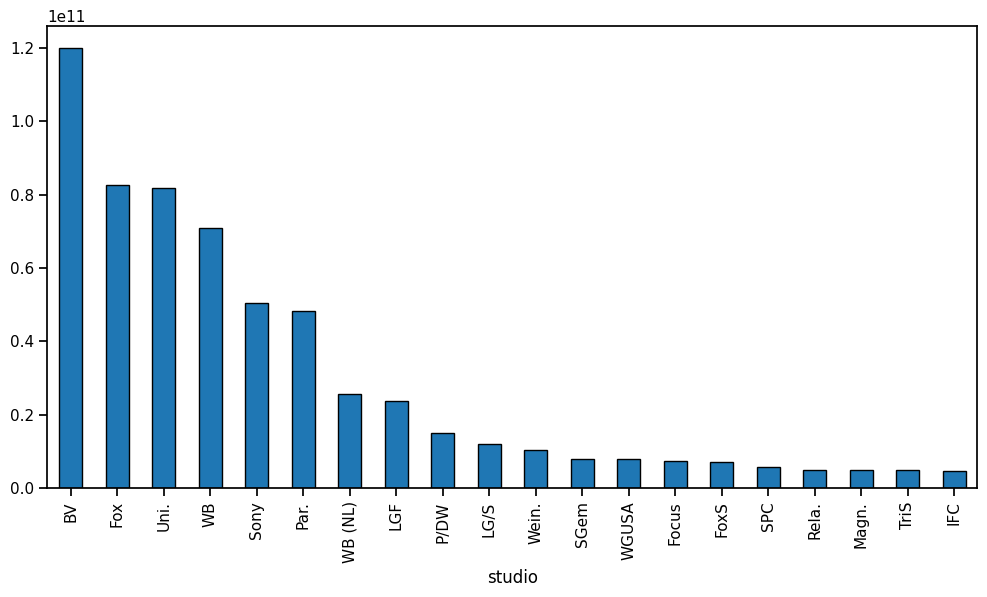

In [ ]:
# mapping the highest performing studio

studio_returnsvalue = studio_totals.sort_values(ascending = False).head(20)
plt.figure(figsize=(12,6))

studio_returnsvalue.plot(kind ='bar', edgecolor = 'black')
ax.set_title('Total Gross Revenue by Studio[Top 30]')
ax.set_xlabel('Studio')
ax.set_ylabel('total_grossvalue')

plt.show()

BV (Buena Vista/Disney) is the clear leader, generating well over $120 billion, more than any other studio by a wide margin. This dominance reflects its powerful portfolio of blockbuster franchises (Marvel, Star Wars, Pixar) and strong global distribution.

Fox and Universal follow, each earning over $80 billion, also benefiting from major franchises and wide international appeal.

Warner Bros. (WB), Sony, and Paramount make up the next tier, earning between $50–70 billion, driven by both tentpole films and diversified genre output.

Studios like Lionsgate (LGF), Weinstein, and Focus Features generate much smaller totals (below $30 billion), often relying on niche markets, mid-budget films, or awards-oriented releases.

The smallest contributors in this ranking — Magnolia (Magn.), TriStar (TriS), and IFC — typically specialize in indie, arthouse, or limited-release films, which naturally yield lower total grosses.

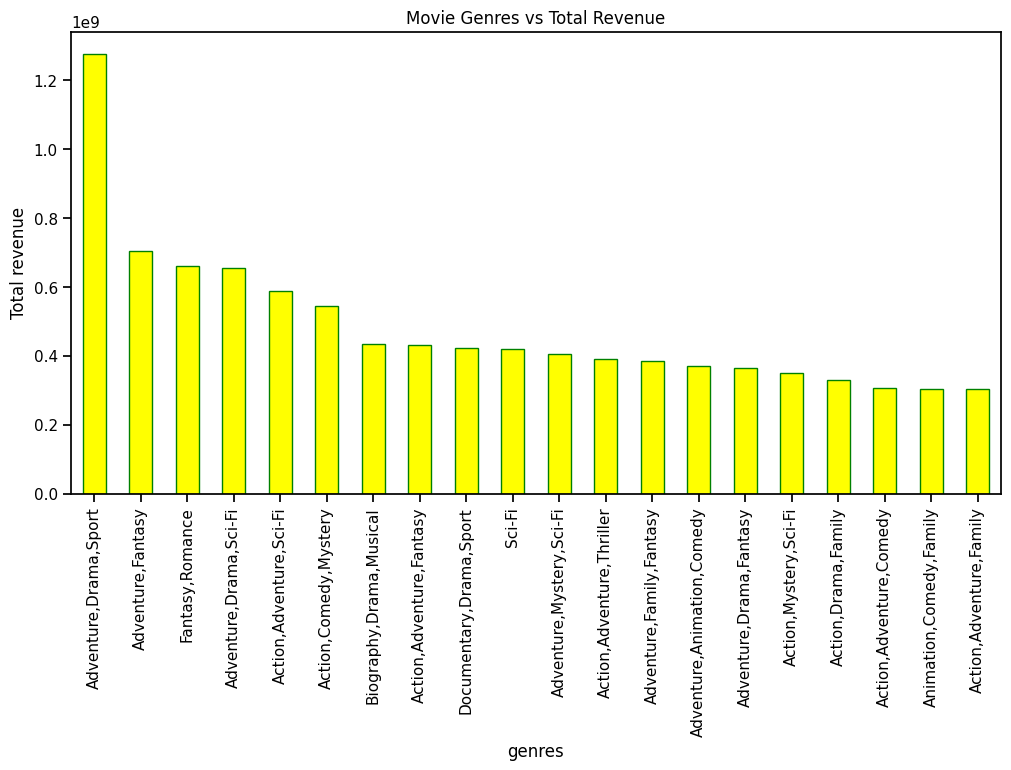

In [ ]:
# 1. Determine the highest and lowest rated genres [ success] in the box office


grouped_revenue = Combined_finaldata.groupby('genres')['total_grossvalue'].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(12,6))
grouped_revenue.plot(kind='bar', color = 'yellow',edgecolor = 'green')
plt.xlabel('genres')
plt.ylabel('Total revenue')
plt.title('Movie Genres vs Total Revenue')
plt.show()

In [ ]:
genre_totals = Combined_finaldata.groupby('tconst')[['total_grossvalue','genres']]
genre_totals.head()

,total_grossvalue,genres
0,19800000.0,"Action,Crime,Drama"
1,8744000.0,"Adventure,Drama,Romance"
2,188100000.0,"Adventure,Comedy,Drama"
3,53200000.0,"Action,Crime,Drama"
4,652301019.4,"Action,Adventure,Sci-Fi"
...,...,...
2999,270700000.0,"Comedy,Drama"
3000,39300000.0,"Action,Sci-Fi,Thriller"
3001,14900000.0,Drama
3002,105000000.0,"Action,Drama"


In [ ]:
# column ;'genres' contains comma separated strings hence need to explode the column.

Combined_finaldata['genres'] = Combined_finaldata['genres'].str.split(',')
Combined_finaldata = Combined_finaldata.explode('genres')

In [ ]:
Combined_finaldata.head()

,tconst,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,total_grossvalue
0,tt0315642,2016,103.0,Action,7.1,15378,Wazir,Relbig.,1100000.0,18700000.0,2016,19800000.0
0,tt0315642,2016,103.0,Crime,7.1,15378,Wazir,Relbig.,1100000.0,18700000.0,2016,19800000.0
0,tt0315642,2016,103.0,Drama,7.1,15378,Wazir,Relbig.,1100000.0,18700000.0,2016,19800000.0
1,tt0337692,2012,124.0,Adventure,6.1,37886,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
1,tt0337692,2012,124.0,Drama,6.1,37886,On the Road,IFC,744000.0,8000000.0,2012,8744000.0


In [ ]:
# to ensure no duplication of the revenue across exploded genres then;
#count number of genres per movie

Combined_finaldata['genre_count']= Combined_finaldata.groupby('tconst')['genres'].transform('count')

# Going ahead now to adjust the revenue so it equally splits among the genres

Combined_finaldata['adj_domestic'] = Combined_finaldata['domestic_gross']/Combined_finaldata['genre_count']
Combined_finaldata['adj_foreign'] = Combined_finaldata['foreign_gross']/Combined_finaldata['genre_count']
Combined_finaldata['adj_totalgross'] = Combined_finaldata['total_grossvalue']/Combined_finaldata['genre_count']

#grouping now by genre

genre_revenue = Combined_finaldata.groupby('genres')['adj_totalgross'].sum().sort_values(ascending=False)

Combined_finaldata.head()



,tconst,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,total_grossvalue,genre_count,adj_domestic,adj_foreign,adj_totalgross
0,tt0315642,2016,103.0,Action,7.1,15378,Wazir,Relbig.,1100000.0,18700000.0,2016,19800000.0,3,366666.666667,6.233333e+06,6.600000e+06
0,tt0315642,2016,103.0,Crime,7.1,15378,Wazir,Relbig.,1100000.0,18700000.0,2016,19800000.0,3,366666.666667,6.233333e+06,6.600000e+06
0,tt0315642,2016,103.0,Drama,7.1,15378,Wazir,Relbig.,1100000.0,18700000.0,2016,19800000.0,3,366666.666667,6.233333e+06,6.600000e+06
1,tt0337692,2012,124.0,Adventure,6.1,37886,On the Road,IFC,744000.0,8000000.0,2012,8744000.0,3,248000.000000,2.666667e+06,2.914667e+06
1,tt0337692,2012,124.0,Drama,6.1,37886,On the Road,IFC,744000.0,8000000.0,2012,8744000.0,3,248000.000000,2.666667e+06,2.914667e+06


Text(0.5, 1.0, 'Movie Rating by Genre')

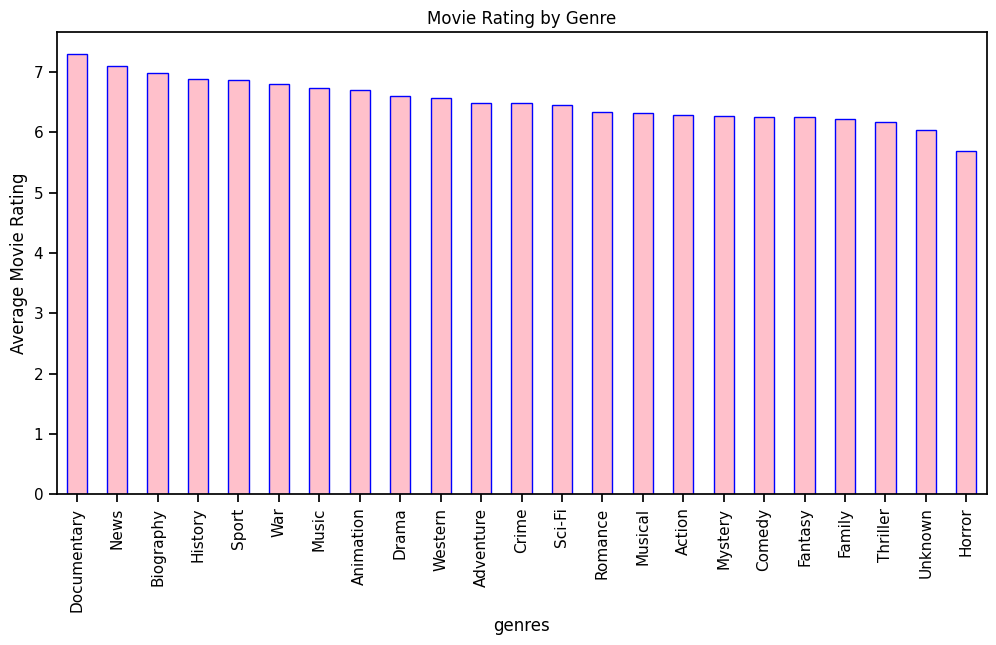

In [ ]:
# 1. Determine the highest and lowest rated genres [ success] in the box office


genre_avg_ratings = Combined_finaldata.groupby('genres')['averagerating'].mean().sort_values(ascending=False)
# colors = sns.color_palette('Set2')

#plotting

plt.figure(figsize=(12,6))
genre_avg_ratings.plot(kind='bar', color = 'pink', edgecolor = 'Blue')
plt.xlabel('genres')
plt.ylabel('Average Movie Rating')
plt.title('Movie Rating by Genre')


the documentary genre rated highest. However, there is a very small variation in rating with the genres like News, Biography , History and sport whereas Horror, Thrillers command low ratings.

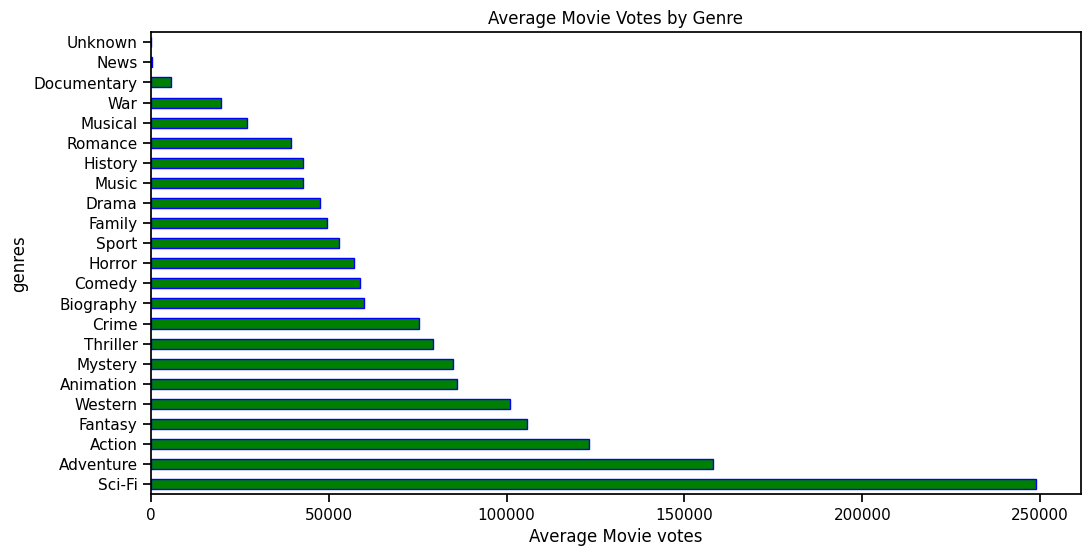

In [ ]:
# 2. Determine the highest and lowest voted genres [ success] in the box office

genre_avg_numvotes = Combined_finaldata.groupby('genres')['numvotes'].mean().sort_values(ascending=False)


#plotting

plt.figure(figsize=(12,6))
genre_avg_numvotes.plot(kind='barh', color = 'green' , edgecolor = 'Blue')
plt.xlabel('Average Movie votes')
plt.ylabel('genres')
plt.title('Average Movie Votes by Genre')
plt.show()


Genres like Sci-Fi stands out significantly, with the highest average number of votes—nearly 250,000.This indicates strong audience engagement and a dedicated fan base.Sci-Fi movies often spark online discussions, fan theories, and cult followings fueling higher user participation in voting.

Low average vote counts were in Documentary, News, Musical, and War genres (under 30,000).They are either niche genres or genres with limited theatrical releases, which naturally restrict audience exposure.

They may appeal more to specific interest groups or educational audiences, who are less likely to vote online.


Text(0.5, 1.0, 'comparison of the foreign and Domestic gross revenue')

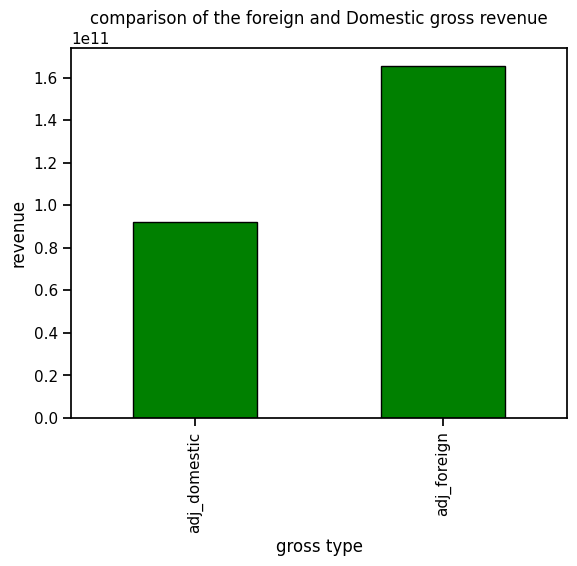

In [ ]:
# foreign vs Domestic gross revenue

Combined_finaldata[['adj_domestic','adj_foreign']].sum().plot(kind ='bar', color = 'green', edgecolor= 'black')
plt.xlabel('gross type')
plt.ylabel('revenue')
plt.title('comparison of the foreign and Domestic gross revenue')


The fact that foreign gross consistently surpasses domestic gross suggests that international markets play a more significant role in total movie revenue.

Studios may be earning a larger share of revenue from global audiences than from domestic (local) viewers.
this influences the making of films to have a universl appeal, using globally recognised actors and multi-language releases.
The strong performance in foreign markets provides a buffer for financial risk,even if a movie underperforms domestically, it might still be profitable globally.

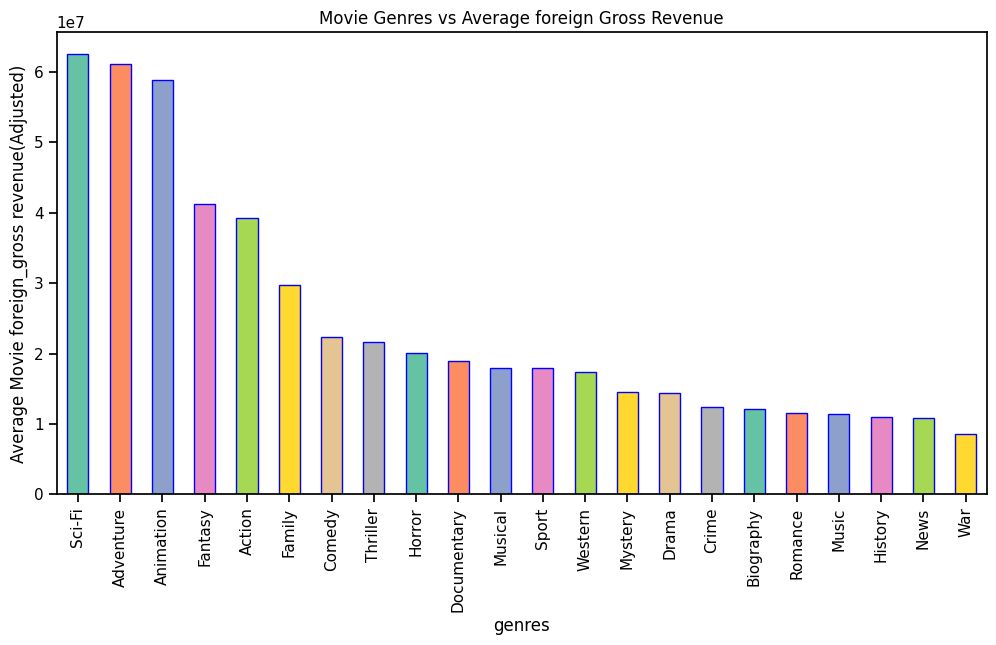

In [ ]:
# diving into discovering which genres are contributing to the foreign gross being higher than the domestic gross revenue.
#plotting the average foreign revenue vs the genres

genre_avg_foreign_gross = Combined_finaldata.groupby('genres')['adj_foreign'].mean().sort_values(ascending=False)
genre_avg_foreign_gross = genre_avg_foreign_gross.drop('Unknown')

#plotting

colors = sns.color_palette('Set2')
plt.figure(figsize=(12,6))
genre_avg_foreign_gross.plot(kind='bar', color = colors , edgecolor = 'Blue')
plt.xlabel('genres')
plt.ylabel('Average Movie foreign_gross revenue(Adjusted)')
plt.title('Movie Genres vs Average foreign Gross Revenue')
plt.show()

Adventure, Sci-Fi, and Animation are the top 3 genres in terms of average foreign gross revenue.They all exceed 170 million on average.Their success suggests broad international appeal, likely due to eg,Spectacle (visual effects, epic scale),Universality (less dependent on cultural nuance, Family-friendliness (especially Animation).

Fantasy and Action follow closely behind, each averaging over 100 million, highlighting their global marketability.These genres often feature franchise films, which perform strongly across different regions.

Genres such as War, News, Documentary, Romance, and Music are at the bottom of the chart, with average revenues under 30 million.These genres are often niche, serious, or region-specific, which may not translate well internationally.

Budget limitations or limited theatrical distribution might also be a factor.


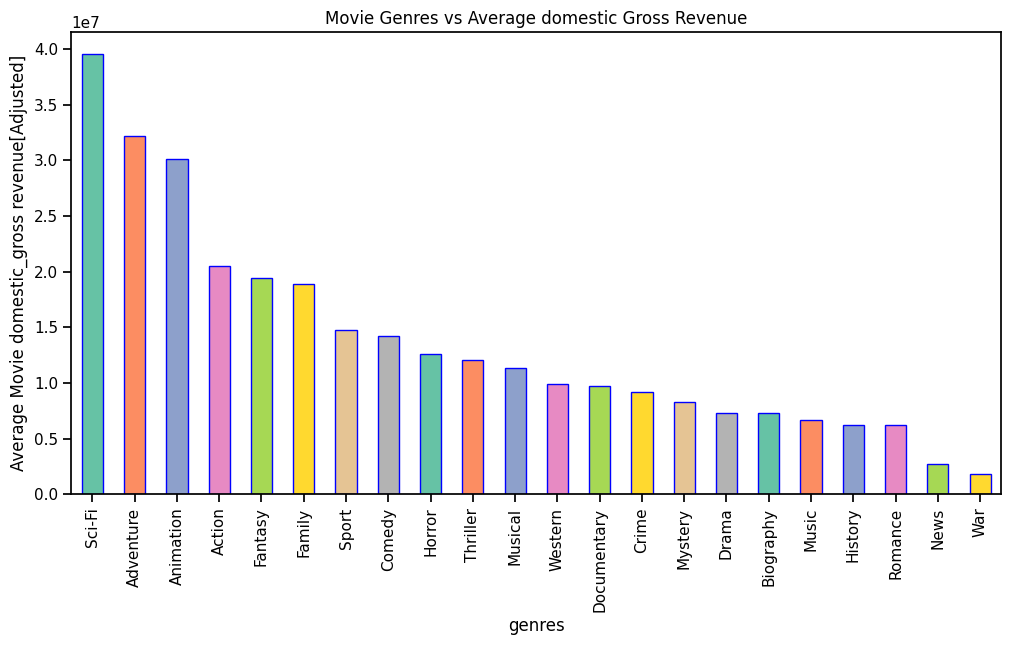

In [ ]:
# diving now into the genres contributing to the domestic revenue realised.
# plotting the average domestic gross revenue vs the genres

genre_avg_domestic_gross = Combined_finaldata.groupby('genres')['adj_domestic'].mean().sort_values(ascending=False)
genre_avg_domestic_gross =  genre_avg_domestic_gross.drop('Unknown')

#plotting

colors = sns.color_palette('Set2')
plt.figure(figsize=(12,6))
genre_avg_domestic_gross.plot(kind='bar', color = colors , edgecolor = 'Blue')
plt.xlabel('genres')
plt.ylabel('Average Movie domestic_gross revenue[Adjusted]')
plt.title('Movie Genres vs Average domestic Gross Revenue')
plt.show()

Top 3 domestic performers are Sci-Fi, Adventure, and Animation,they show strong consistency with their foreign performance, proving universal appeal.

Sci-Fi leads here, slightly outperforming its foreign counterpart.

These films often benefit from strong local fan bases, high marketing budgets, and blockbuster appeal.

Action and Fantasy follow closely, again aligning with foreign market trends but earning slightly less domestically.
Genres like Documentary, News, and War are again at the bottom in terms of average gross revenue.They typically have limited theatrical releases, and smaller budgets.

The domestic audience may prefer these genres for streaming or educational purposes, not big-screen viewing.

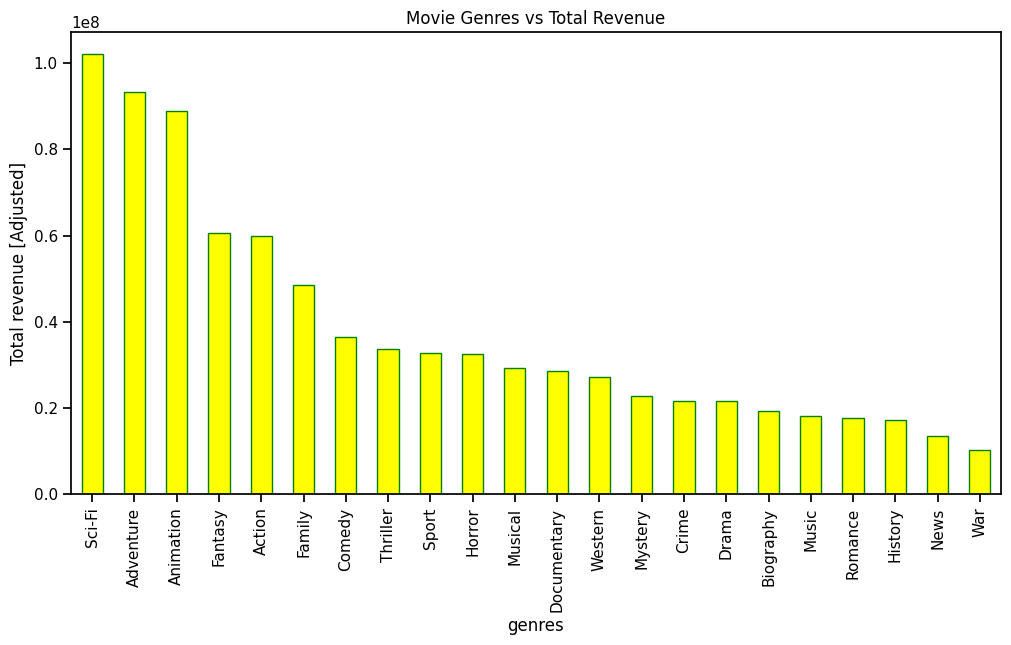

In [ ]:
grouped_revenue = Combined_finaldata.groupby('genres')['adj_totalgross'].mean().sort_values(ascending=False)
grouped_revenue = grouped_revenue.drop('Unknown')

plt.figure(figsize=(12,6))
grouped_revenue.plot(kind='bar', color = 'yellow',edgecolor = 'green')
plt.xlabel('genres')
plt.ylabel('Total revenue [Adjusted]')
plt.title('Movie Genres vs Total Revenue')
plt.show()

[[1.         0.12721654]
 [0.12721654 1.        ]]


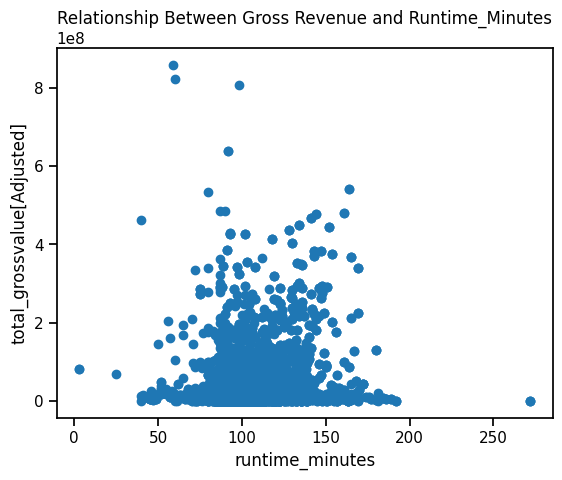

In [ ]:
# correlation of the runtime and total gross revenue returned.
plt.scatter( Combined_finaldata['runtime_minutes'],Combined_finaldata['adj_totalgross']);
plt.xlabel('runtime_minutes')
plt.ylabel('total_grossvalue[Adjusted]')
plt.title('Relationship Between Gross Revenue and Runtime_Minutes')

print(np.corrcoef(Combined_finaldata['adj_totalgross'], Combined_finaldata['runtime_minutes'],[0.1]))

A notable Weak positive correlation between runtime and gross revenue.Longer movies may earn slightly more, but the trend is not strong nor consistent.
Runtime alone is not a strong predictor of gross revenue. Other variables like budget, cast, genre, release date, marketing spend likely have stronger impacts.

Runtime may have some influence, but it’s not decisive on its own.

<Axes: >

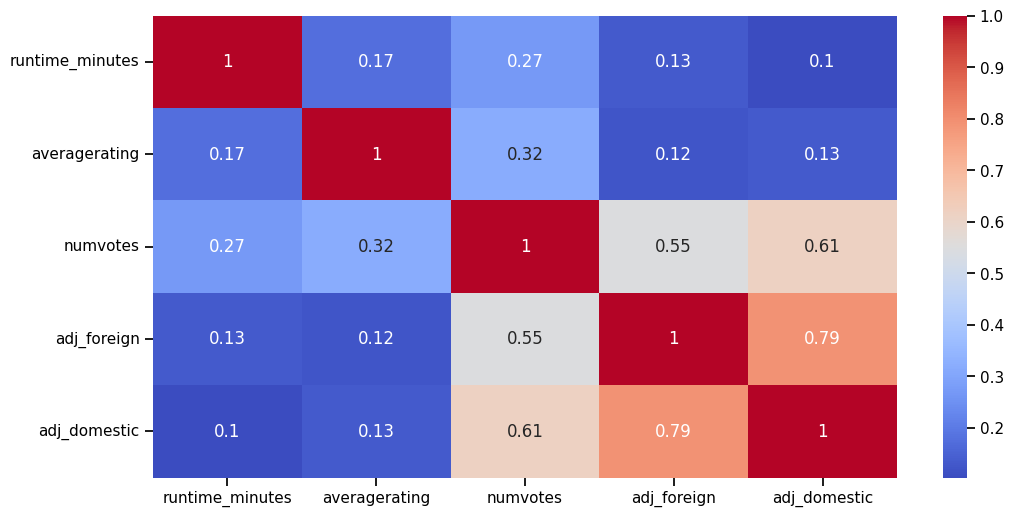

In [ ]:
#Correlation between numerical variables related to movies [  Heatmap]

plt.figure(figsize=(12,6))
sns.heatmap(Combined_finaldata[['runtime_minutes','averagerating','numvotes','adj_foreign','adj_domestic']].corr(),cmap ='coolwarm',annot = True)


The values range from 0 (no correlation) to 1 (perfect correlation), and the heatmap uses colors from blue (low correlation) to red (high correlation).

**Strong positive correlation**; [0.79], Movies that perform well in the domestic market also tend to perform well in the foreign market, and vice versa.

Highly voted movies tend to have higher box office earnings, likely due to popularity and wider reach. Where,Numvotes vs Domestic Gross ≈ 0.61 ,Numvotes vs Foreign Gross ≈ 0.55

**Runtime vs other variables** -> Averagerating, Numvotes, Gross Revenues all have low correlations (~0.2 or less).This suggests that runtime alone doesn't significantly influence ratings, votes, or earnings.

**Averagerating vs Gross Revenues** Correlations are very low (~0.12). **Good** ratings do not necessarily translate to high box office revenue.

# Conclusions

Based on the analysis, several patterns emerge regarding studio performance, genre profitability, audience engagement, and market dynamics.

The market is highly top-heavy — the top 6 studios(Buena/Disney, Fox, Universl, Warner Bros,Sony,Paramount) dominate global earnings. For a new entrant or smaller studio, competing head-to-head on blockbuster scale would be challenging. Instead, they might focus on underserved genres, streaming partnerships, or niche audiences to build market presence without direct competition against the dominant players.

When examining performance by genre — and adjusting for multi‑genre movies to avoid inflated results — Sci‑Fi, Adventure, and Animation emerge as the most lucrative categories in both domestic and foreign markets. These genres share a universal appeal, often relying on visual spectacle, family‑friendly themes, or imaginative storytelling that transcends cultural boundaries. Action and Fantasy also perform strongly but fall slightly behind the top three. In contrast, genres such as Documentary, News, War, and Music generate the least box office revenue, likely because of their niche focus, limited theatrical runs, and smaller production budgets.

Interestingly, the genres with the highest average ratings — such as Documentary, News, Biography, and History — are not the most profitable. This suggests that critical acclaim does not necessarily translate into high box office returns. Conversely, genres like Horror and Thriller, despite receiving lower ratings, can still achieve commercial viability if they resonate with audiences.

Audience engagement, measured through the average number of votes, tells a similar story. Sci‑Fi dominates with nearly 250,000 votes on average, reflecting a dedicated fan base and high online interaction. Genres such as Documentary, News, Musical, and War see much lower engagement, typically under 30,000 votes, indicating that they cater to smaller, more targeted audiences.

A striking finding is that foreign gross consistently surpasses domestic gross, underscoring the importance of international markets. Adventure, Sci‑Fi, and Animation perform exceptionally well overseas, often exceeding $170 million in average foreign gross. Their success can be attributed to their visual universality, global marketing appeal, and ability to perform well across cultural contexts. In contrast, niche genres tend to underperform internationally due to limited relevance or appeal outside their home markets.

The analysis of runtime versus total gross revenue shows only a weak positive correlation, suggesting that longer movies may earn slightly more but that runtime is far from a decisive factor in financial performance. Correlation analysis further reveals a strong relationship between domestic and foreign grosses (0.79), indicating that a movie’s success in one market often mirrors its performance in the other. Audience engagement (votes) shows a moderate positive correlation with revenue, while average ratings display minimal correlation, reinforcing the idea that popularity and reach matter more for box office results than critical scores.

# Recommendations

Overall, the data suggests that Microsoft’s new movie studio would benefit most from prioritizing high‑performing, globally marketable genres such as Sci‑Fi, Adventure, Animation, Action, and Fantasy. Marketing should focus on building strong fan engagement, leveraging internationally recognized talent, and tailoring content for global appeal.

Meanwhile, high‑rated but less commercially viable genres could be positioned for streaming platforms or awards campaigns rather than wide theatrical releases.

Finally, Microsoft should consult high revenue returning studios like BV(BuenaVista), Fox and Universal to gain the market knowledge and rise up the ranks of top movie producers.